# Heart Failure Classification Problem

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
tf.__version__

'2.8.2'

In [55]:
file = ('/content/heart.csv')
  
df = pd.read_csv(file)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["Sex", "ST_Slope", "ExerciseAngina", "RestingECG", "ChestPainType"])
)

# Create X & y
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [11]:
X_train.loc[0]

Age                   40
Sex                    M
ChestPainType        ATA
RestingBP            140
Cholesterol          289
FastingBS              0
RestingECG        Normal
MaxHR                172
ExerciseAngina         N
Oldpeak              0.0
ST_Slope              Up
Name: 0, dtype: object

In [12]:
X_train_normal[0]

array([0.27083333, 0.6       , 0.39800995, 0.94366197, 0.38636364,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 1.        , 0.        ])

In [132]:
tf.random.set_seed(42)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="gelu"),
    tf.keras.layers.Dense(10, activation="gelu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

history = model.fit(X_train_normal, y_train, callbacks=[callback], epochs=500)

Epoch 1/500


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


23/23 [==============================] - 1s 2ms/step - loss: 0.6150 - accuracy: 0.7875
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4793 - accuracy: 0.8515
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8651
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8638
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 0.3470 - accuracy: 0.8651
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8665
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.8610
Epoch 8/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8678
Epoch 9/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8651
Epoch 10/500
23/23 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8719
Epoch 11/500
23/23 [=

In [133]:
model.evaluate(X_test_normal, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8587


[0.35432472825050354, 0.8586956262588501]

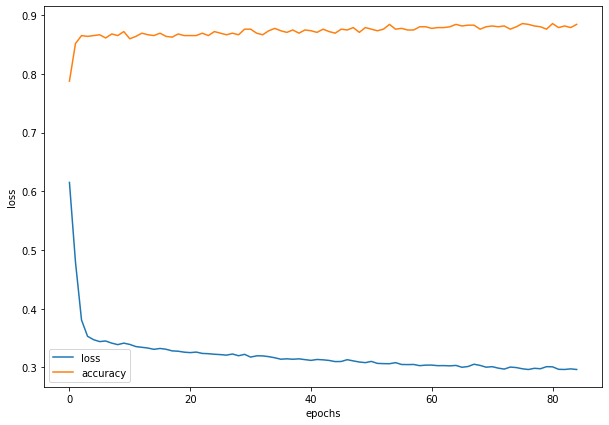

In [134]:
# Plot history
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.ylabel("loss")
plt.xlabel("epochs");

In [135]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_pred = model.predict(X_test_normal)

In [136]:
y_test[:10], y_pred[:10]

(668    0
 30     1
 377    1
 535    1
 807    0
 793    1
 363    1
 583    0
 165    1
 483    1
 Name: HeartDisease, dtype: int64, array([[0.0192022 ],
        [0.22477308],
        [0.94023645],
        [0.95187443],
        [0.01112789],
        [0.8104623 ],
        [0.91550434],
        [0.15896696],
        [0.79662454],
        [0.9682922 ]], dtype=float32))

In [137]:
# Convert our prediction probabilities to binary format and view the first 10 
y_pred_binary = tf.round(y_pred)
y_pred_binary[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)>

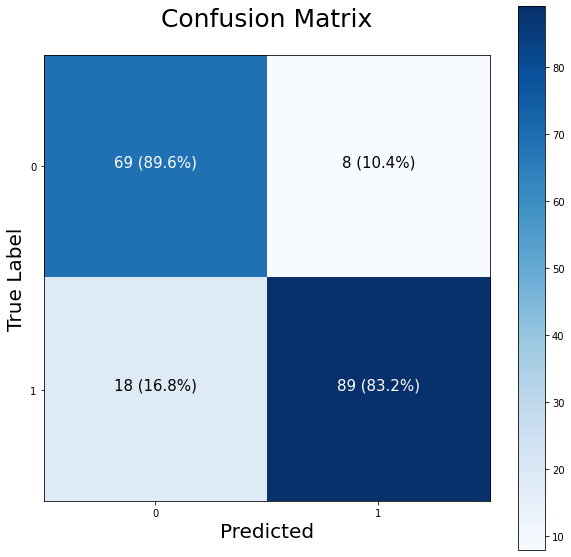

In [138]:
import itertools

# Create the confusion metrix
cm = confusion_matrix(y_test, y_pred_binary)
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion metrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=(10, 10))
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(25)



# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)